In [21]:

from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix



In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# import the data
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# explore the data

In [23]:
print("Shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(x_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


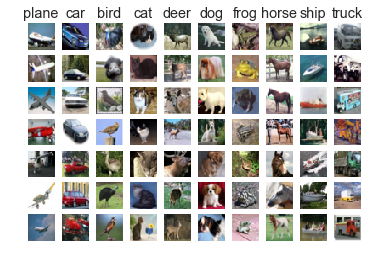

In [24]:
import numpy as np
import matplotlib.pyplot as plt
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# preprocess the data

In [25]:
#shuffle the training data
import numpy as np
shuffle_index = np.random.permutation(50000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [26]:
from sklearn.preprocessing import StandardScaler  
x_train =np.reshape(x_train, (50000,3072))
y_train=np.reshape(y_train, (50000,))
x_test =np.reshape(x_test, (10000,3072))
y_test =np.reshape(y_test, (10000,))
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# train the model using ridge classifier

In [44]:
ML_model = RidgeClassifier(alpha = 0, max_iter = 100, random_state = 43);

ML_model.fit(x_train, y_train)

# Cross Validation for predicting training error
#No of K = 3; 
cross_val = Cross_validation(3, x_train, y_train, model= ML_model)
cross_val.fit()
Train_pred_y = cross_val.predict(x_train)
# Training accuracy calculation
print('Traning Accuracy is = ' + str(cross_val.score(y_train, Train_pred_y) * 100) + '%')


Model Accuracy = 0.3544
Model Accuracy = 0.3508
Model Accuracy = 0.35624
Model Accuracy = 0.35168
Traning Accuracy is = 49.118%


In [45]:
# Test Accuracy calculation
Test_pred_y = ML_model.predict(x_test);
test_accuracy = sum(Test_pred_y == y_test); 
print('Generalization Accuracy = ' + str(test_accuracy/len(Test_pred_y) * 100)+ '%');

Generalization Accuracy = 35.35%


In [46]:
#Confusion Matrix 
conf_mat = confusion_matrix(y_test, Test_pred_y)
print('------------Confusion Matrix-------------')
print(conf_mat)

------------Confusion Matrix-------------
[[454  67  39  33  21  24  33  53 203  73]
 [ 66 436  30  34  28  30  54  57  86 179]
 [113  44 202  81 113  93 154  94  61  45]
 [ 70  86  86 181  68 175 153  63  51  67]
 [ 74  40 121  59 246  91 170 129  27  43]
 [ 64  68  89 135  76 275 110  87  56  40]
 [ 18  56  97 104 101  74 423  59  27  41]
 [ 52  54  55  52  80  87  55 412  61  92]
 [149  86  15  32  12  47  27  28 493 111]
 [ 67 210  23  30  28  23  52  60  94 413]]


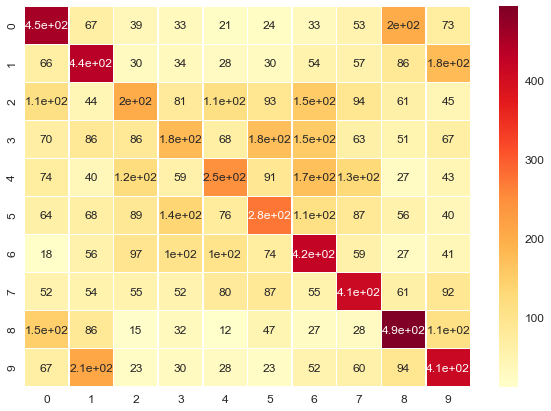

In [47]:
#visualising the confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(conf_mat, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},linewidths=.5, cmap='YlOrRd')# font size
plt.show()
